###**Universo Temprano - Tarea 2 (\#3)**

**Nombre:** Sebastián Numpaque

**Documento:** C. C. 1002396960


###**Common Packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as const

###**Exercise 8.1)**

The purpose of this problem is to determine how changing the value of
the baryon-to-photon ratio, $\eta$, affects the recombination temperature in
the early universe. Plot the fractional ionization $X$ as a function of
temperature, in the range 3000 K < T < 4500 K; first make the plot
assuming $\eta = 4 × 10^{-10}$, then assuming $\eta = 8 × 10^{-10}$. How much does
this change in $\eta$ affect the computed value of the recombination
temperature $T_{rec}$ if we define $T_{rec}$ as the temperature at which $X=1/2$?



---
A partir de la ecuación de *Saha*, escrita en terminos de la fracción de ionización $X$, mostramos su respectiva dependencia con la temperatura
\
\
$$
\frac{1 - X}{X^2} = S(T, \eta) = 3.84 \,\eta \,\left( \frac{kT}{m_e c^2} \right)^{3/2} \exp \left( \frac{Q}{kT} \right)
$$
\
\
$$
X = X(T, \eta) = \frac{-1 + \sqrt{1 + 4S(T, \eta)}}{2S(T, \eta)}
$$

In [4]:
# Physical Constants [S.I]
c = const.c.value
k_B = const.k_B.value
m_e = const.m_e.value

# Ionization Energy [J]
Q = 13.6*u.eV.to(u.J)

# Temperature Range [K]
Ts = np.linspace(3000, 4500, 1000)

# Saha Equation
S = lambda T, eta: 3.84*eta*((k_B*T)/(m_e*c**2))**(3/2)*np.exp(Q/(k_B*T))

# Fractional Ionization
X_saha = lambda T, eta: (-1 + (1 + 4*S(T, eta))**0.5)/(2*S(T, eta))

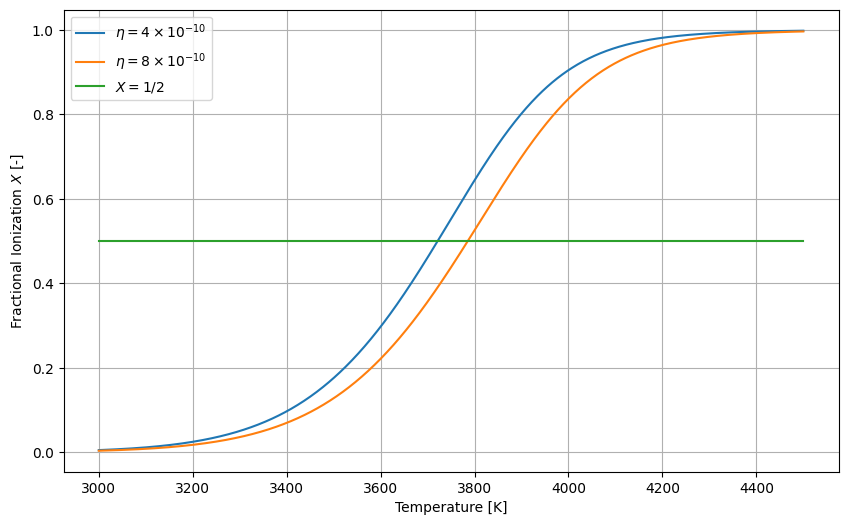

In [6]:
plt.figure(figsize = (10, 6))

# Baryon-to-Photon ratio 4e-10
plt.plot(Ts, X_saha(Ts, eta = 4e-10),
         label = r'$\eta = 4 \times 10^{-10}$')

# Baryon-to-Photon ratio 8e-10
plt.plot(Ts, X_saha(Ts, eta =8e-10),
         label = r'$\eta = 8 \times 10^{-10}$')

# Temperature of Recombination at X = 1/2
plt.plot(Ts, 1/2*np.ones_like(Ts), label = r'$X=1/2$')

plt.xlabel(r'Temperature [K]')
plt.ylabel(r'Fractional Ionization $X$ [-]')

plt.grid()
plt.legend()

plt.show()

Si buscamos determinar la temperatura en la época de recombinación, definida como $T_{rec}$ a la que se obtiene $X=1/2$, debemos encontrar la solución a la temperatura desde la ecuación de *Saha*
\
\
$$2=S(T_{rec}, \eta) = 3.84 \,\eta \,\left( \frac{kT_{rec}}{m_e c^2} \right)^{3/2} \exp \left( \frac{Q}{kT_{rec}} \right)
$$
\
\
Para este objetivo implementamos el método númerico de Root-Finding integrado desde `scipy.optimize.root_scalar`

In [7]:
from scipy.optimize import root_scalar

In [9]:
T_solve = lambda T, eta: S(T, eta) - 2

# Solution for eta = 4e-10
T_rec = root_scalar(T_solve, args = (eta := 4e-10,),
                    bracket = (3000, 4500)).root

print(f'Temperature of Recombination at η = 4e-10: {T_rec:.2f} K\n')

# Solution for eta = 8e-10
T_rec = root_scalar(T_solve, args = (eta := 8e-10,),
                    bracket = (3000, 4500)).root

print(f'Temperature of Recombination at η = 8e-10: {T_rec:.2f} K')

Temperature of Recombination at η = 4e-10: 3721.38 K

Temperature of Recombination at η = 8e-10: 3785.54 K


### **Exercise 8.2)**

Assuming a baryon-to-photon ratio $\eta = 6.1 \times 10^{-10}$, at what temperature $T$ will there be one ionizing photon, with $h\nu > Q = 13.6 \, \text{eV}$, per baryon?  
Is the temperature you calculate greater than or less than $T_{\text{rec}} = 3760 \, \text{K}$?

**Hint:** The result of Exercise 2.5 will be useful



---

A partir de la expresión **2.5**
\
\
$$\frac{n(h\nu>Q)}{n_\gamma}\approx 0.42\left(\frac{Q}{kT}\right)^2\,\exp{\left(-\frac{Q}{kT}\right)}$$
\
\
Buscando llegar a una proporción 1 : 1 entre el número bariones y fotones con energía mayores a la energia de ionización $Q$, debemos de hallar la solución numérica para $T$ dado un valor de $\eta$
\
\
$$\eta=\frac{n_{bary}}{n_\gamma}\quad\longrightarrow\quad\eta\approx 0.42\left(\frac{Q}{kT}\right)^2\,\exp{\left(-\frac{Q}{kT}\right)}$$
\
\
Particularmente, esta temperatura resulta ser mayor a la temperatura que se alcanza en la época de recombinación.

In [27]:
T_ratio = lambda T, eta: 0.42*((Q/(k_B*T))**2)*np.exp(-Q/(k_B*T)) - eta

# Root-Finding
T = root_scalar(T_ratio, args = (eta := 6.1e-10,),
                bracket = (5500, 6000)).root

print(f'Temperature of 1:1 ratio at η = 6.1e-10: {T:.2f} K)')

Temperature of 1:1 ratio at η = 6.1e-10: 5858.89 K)


###**Exercise 8.3)**

Imagine that at the time of recombination, the baryonic portion of the universe consisted entirely of $^4$He (that is, helium with two protons and two neutrons in its nucleus). The ionization energy of helium (that is, the energy required to convert neutral He to He$^+$ is $Q_{\text{He}} = 24.6 \, \text{eV} $. At what temperature would the fractional ionization of the helium be $X = 1/2$ ? Assume that $\eta = 6 \times 10^{-10} $ and that the number density of He$^+$ is negligibly small.

[The relevant statistical weight factor for the ionization of helium is $g_{\text{He}} / (g_e g_{\text{He}^+}) = 1/4$]



---

La ecuación de *Saha* presenta una forma general que relaciona las especies ionizadas de cualquier elemento de la siguiente forma
\
\
$$
\frac{n_i}{n_e n_{i+1}} = \frac{g_i}{g_e g_{i+1}} \left( \frac{m_e k T}{2 \pi \hbar^2} \right)^{-3/2} \exp \left( \frac{Q_i}{k T} \right)
$$
\
\
Si tomamos $n_0=n_{\text{He}}$ como la especie neutral del Helio, para un valor de energia de ionización $Q_{\text{He}}=24.6\,\text{eV}$, también es posible definir una fracción de ionización $X$ equivalente
\
\
$$X=\frac{n_{\text{He}^+}}{n_{\text{He}^+}+n_{\text{He}}}$$
\
\
De forma análoga al desarrollo presentado por Ryden B. podemos escribir la ecuación de Saha en la forma de una ecuación cuadrática para la fracción de ionización
\
\
$$
\frac{1 - X}{X^2} = \frac{1}{4} n_{\text{He}} \left( \frac{m_e k T}{2 \pi \hbar^2} \right)^{-3/2} \exp \left( \frac{Q_{\text{He}}}{k T} \right)
$$
\
\
En términos de una de un Baryon-to-Photon ratio $\eta$, tenemos una expresión final bastante útil, considerando que el átomo de Helio está compuesto por cuatro bariones
\
\
$$
\eta=\frac{n_{bary}}{n_\gamma}=\frac{4n_{\text{He}}}{n_\gamma}\quad;\quad n_\gamma = 0.2436\left(\frac{kT}{\hbar c}\right)^3
$$
\
\
$$
\frac{1 - X}{X^2} = S(T,\eta)=0.2398 \eta \left( \frac{kT}{m_e c^2} \right)^{3/2} \exp \left( \frac{Q_{\text{He}}}{k T} \right)
$$

In [29]:
# Physical Constants [S.I]
c = const.c.value
k_B = const.k_B.value
m_e = const.m_e.value

# Ionization Energy [J]
Q = 24.6*u.eV.to(u.J)

# Temperature Range [K]
Ts = np.linspace(3000, 9000, 1000)

# Saha Equation
S = lambda T, eta: 0.2398*eta*((k_B*T)/(m_e*c**2))**(1.5)*np.exp(Q/k_B/T)

# Fractional Ionization
X_saha = lambda T, eta: (-1 + (1 + 4*S(T, eta))**0.5)/(2*S(T, eta))

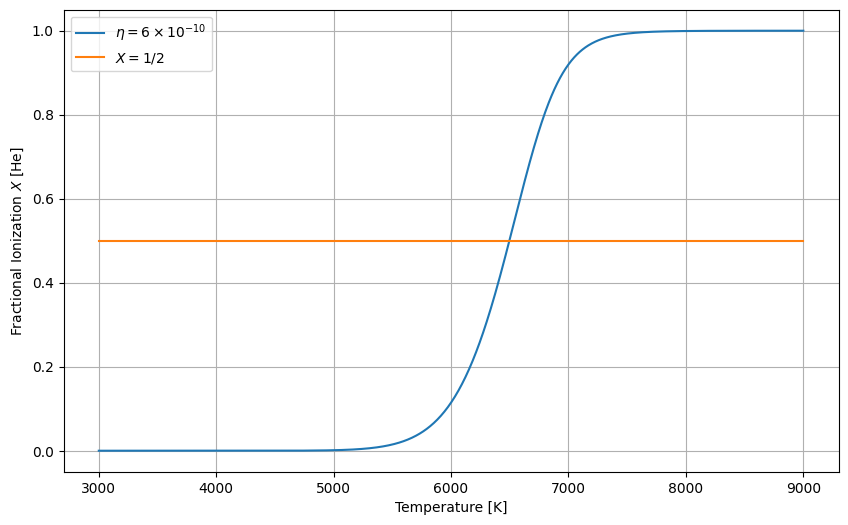

In [32]:
plt.figure(figsize = (10, 6))

# Baryon-to-Photon ratio 4e-10
plt.plot(Ts, X_saha(Ts, eta = 6e-10),
         label = r'$\eta = 6 \times 10^{-10}$')

# Temperature of Recombination at X = 1/2
plt.plot(Ts, 1/2*np.ones_like(Ts), label = r'$X=1/2$')

plt.xlabel(r'Temperature [K]')
plt.ylabel(r'Fractional Ionization $X$ [He]')

plt.grid()
plt.legend()

plt.show()

Buscando nuevamente determinar la temperatura a la que se obtiene $X=1/2$
\
\
$$2=S(T, \eta) = 0.2398 \,\eta \,\left( \frac{kT}{m_e c^2} \right)^{3/2} \exp \left( \frac{Q}{kT} \right)
$$
\
\
Para este objetivo implementamos el método númerico de Root-Finding integrado desde `scipy.optimize.root_scalar`

In [33]:
T_solve = lambda T, eta: S(T, eta) - 2

# Solution for eta = 6e-10
T_rec = root_scalar(T_solve, args = (eta := 6e-10,),
                    bracket = (3000, 9000)).root

print(f'Temperature of Recombination at η = 4e-10: {T_rec:.2f} K\n')

Temperature of Recombination at η = 4e-10: 6496.61 K



###**Exercise 8.4)**

What is the proper distance $ d_p $ to the surface of last scattering? What is the luminosity distance $ d_L $ to the surface of last scattering? Assume that the Benchmark Model is correct, and that the redshift of the last scattering surface is $ z_{\text{ls}} = 1090 $.



---



Recordemos la forma de calcular la distancia propia a cierta distancia, en este caso la superficie de *last-scattering*, considerando el modelo *Benchmark*
\
\
$$
d_p = \frac{c}{H_0} \int_{a_{ls}}^{1} \frac{da}{a^2 \sqrt{\Omega_{r,0} a^{-4} + \Omega_{m,0} a^{-3} + \Omega_{\Lambda,0} + (1 - \Omega_0) a^{-2}}}
$$
\
\
Mientras que la distancia luminosa se calcula como $d_L=\frac{d_p}{a}$

In [34]:
from scipy.integrate import quad

In [35]:
# Proper Distance Integration Function
def proper_distance(a):

  matter = Omega_m*(a**(-3))
  radiation = Omega_r*(a**(-4))
  dark_energy = Omega_Lambda
  curvature = (1 - Omega_0)*a**(-2)

  return 1/((a**2)*np.sqrt(radiation + matter + dark_energy + curvature))

In [43]:
# Hubble Distance
c = const.c
H0 = 68*u.km/u.s/u.Mpc
d_hubble = (c/H0).to(u.Mpc)

# Benchmark Parameters
Omega_m = 0.31
Omega_r = 9e-5
Omega_Lambda = 0.69
Omega_0 = Omega_m + Omega_r + Omega_Lambda

# Last Scattering Redshift
z_ls = 1090
a_ls = 1/(1 + z_ls)

# Proper Distance
d_p = d_hubble*quad(proper_distance, a_ls, 1)[0]

# Luminous Distance
d_L = d_p/a_ls

print(f'Proper Distance: {d_p:.2f}')
print(f'\nLuminous Distance: {d_L:.2f}')

Proper Distance: 13831.62 Mpc

Luminous Distance: 15090300.80 Mpc
